In [1]:
using Graphs
using Plots
using LinearAlgebra
using Statistics
using DelimitedFiles
include("../mpdbp.jl")
include("../exact/random_regular.jl")
include("../glauber.jl")
include("../exact/montecarlo.jl")
include("../bp_fast.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [95]:
q = q_glauber
T = 3
N = 25
k = 4
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
h = zeros(N)
J = ones(ne(g))
β = 0.8
ising = Ising(g, J, h, β)

p⁰ = map(1:N) do i
    r = 0.7
    [r, 1-r]
end;

In [96]:
bp = mpdbp(ising, T; p⁰, d=1)
cb = CB_BP(bp);

In [97]:
nobs = N
draw_node_observations!(bp, nobs, last_time=true);

In [ ]:
# svd_trunc = TruncThresh(1e-2)
svd_trunc = TruncBond(6)
iterate!(bp, maxiter=100; svd_trunc, cb, tol=1e-3);

Running MPdBP: iter 2 	 Time: 0:00:03
  Δ:  3.3682756534503864

In [ ]:
pl_err = plot(cb.Δs, ylabel="convergence error", xlabel="iters", m=:o, yaxis=:log10, 
    size=(300,200), label="")

In [ ]:
b_bp = beliefs(bp)
m_bp = [[bbb[1]-bbb[2] for bbb in bb] for bb in b_bp];

In [ ]:
ns = 2*10^6
sms = sample(bp, ns)
b_mc = marginals(sms)
m_mc = [[bbb[1]-bbb[2] for bbb in bb] for bb in b_mc];

Glauber on random regular graph N=25, k=4. βJ=0.8, h=0
25 random observations at final time
Max matrix size: 6x6


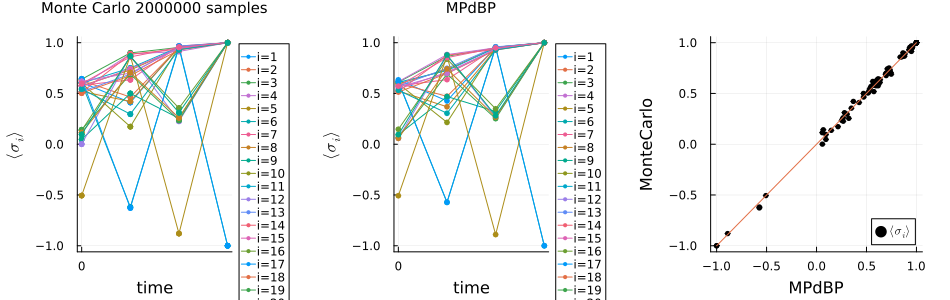

In [103]:
pl_mc = plot(xlabel="time", ylabel="\$\\langle\\sigma_i\\rangle\$", xticks=0:5:T, 
    title="Monte Carlo $ns samples", legend=:outertopright)
for i in 1:N
    plot!(pl_mc, 0:T, m_mc[i], label="i=$i", m=:o, ms=3, lw=1, markerstrokecolor=:auto)
end
pl_bp = plot(xlabel="time", ylabel="\$\\langle\\sigma_i\\rangle\$", xticks=0:5:T, title="MPdBP",
    legend=:outertopright)
for i in 1:N
    plot!(pl_bp, 0:T, m_bp[i], label="i=$i", m=:o, ms=3, lw=1, markerstrokecolor=:auto)
end
pl_sc = scatter(reduce(vcat, m_bp), reduce(vcat, m_mc), xlabel="MPdBP", ylabel="MonteCarlo", 
    label="\$\\langle\\sigma_i\\rangle\$", ms=3, c=:black, legend=:bottomright)
plot!(identity, label="", size=(300,300))
println("Glauber on random regular graph N=$N, k=$k. βJ=$β, h=0")
println("$nobs random observations at final time")
println("Max matrix size: ", svd_trunc.mprime, "x", svd_trunc.mprime)
plot(pl_mc, pl_bp, pl_sc, titlefontsize=10, size=(950, 300), 
    margin=5Plots.mm, layout=(1,3))